# Assignment 1a

## Development Environment Setup

2. 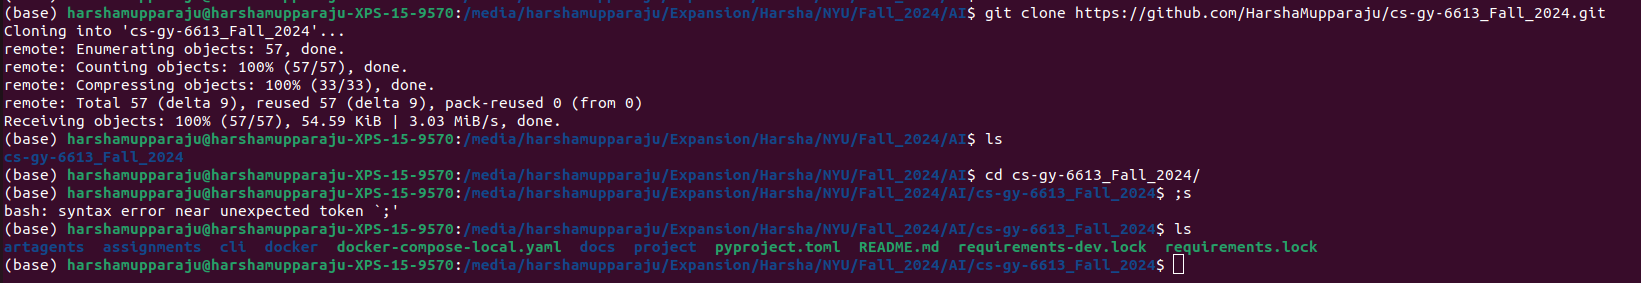



## Simulation of Multivariate Normal Distribution

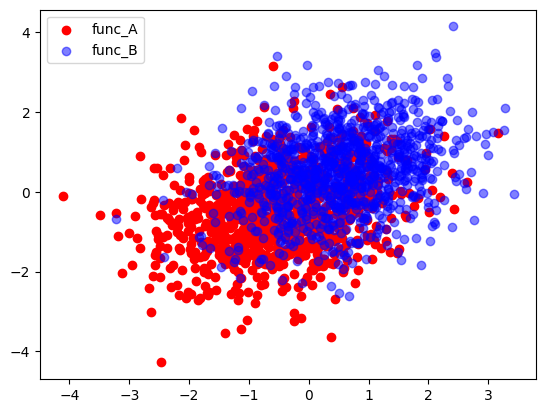

In [1]:
import torch 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
m = 1000

# Multivariate Gaussian A
A_mean = torch.Tensor([-0.5, -0.5])
A_cov = torch.Tensor([[1, 0.25], [0.25, 1]])
func_A = torch.distributions.multivariate_normal.MultivariateNormal(A_mean, A_cov)
samples_A = func_A.sample(sample_shape = [m])

#Multivariate Gaussian B
B_mean = torch.Tensor([0.5, 0.5])
A_cov = torch.Tensor([[1, 0.25], [0.25, 1]])
func_B = torch.distributions.multivariate_normal.MultivariateNormal(B_mean, A_cov)
samples_B = func_B.sample(sample_shape = [m])

# Plot the samples
import matplotlib.pyplot as plt
plt.scatter(samples_A[:,0], samples_A[:,1], c='r', label='func_A')
plt.scatter(samples_B[:,0], samples_B[:,1], c='b', label='func_B', alpha=0.5)
plt.legend()
plt.show()



In [2]:
multivariate_gaussian_samples = torch.cat([samples_A, samples_B], dim=0)

In [3]:
multivariate_gaussian_samples[0].shape

torch.Size([2])

## K-Means Clustering

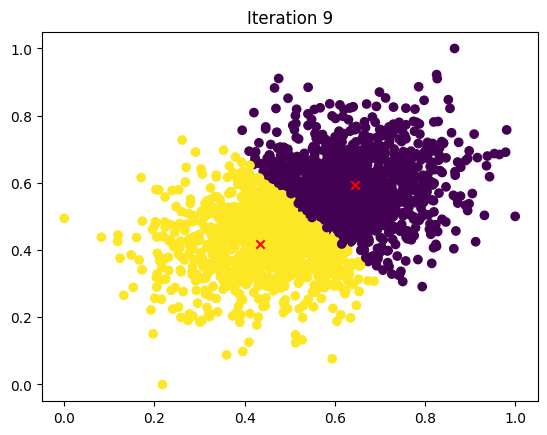

In [4]:
import torch
from IPython.display import clear_output
# Scale the data
multivariate_gaussian_samples = (multivariate_gaussian_samples - multivariate_gaussian_samples.min(dim=0).values) / (multivariate_gaussian_samples.max(dim=0).values - multivariate_gaussian_samples.min(dim=0).values)

k = 2

#Assign each data point to the closest centroid
def label_data(data, centroids):
    distances = torch.sqrt(((data[:, None] - centroids) ** 2).sum(dim=2))
    return distances.argmin(dim=1)

#Update the centroids
def update_centroids(data, labels, k):
    new_centroids = []
    for i in range(k):
        new_centroids.append(data[labels == i].mean(dim=0))
    return torch.stack(new_centroids)

def plot_kmeans(iteration, data, centroids, labels):
    plt.title(f'Iteration {iteration}')
    plt.scatter(data[:, 0], data[:, 1], c=labels)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='r', marker='x')
    plt.show()

#K-means algorithm
def kmeans(data, k, max_iters=100):
    centroids = []
    #Randomly pick intitial centroids from data
    for i in range(k):
        centroids.append(data[torch.randint(0, data.size(0), (1,))])
    centroids = torch.cat(centroids, dim=0)
    for i in range(max_iters):
        labels = label_data(data, centroids)
        clear_output(wait=True)
        plot_kmeans(i, data, centroids, labels)

        new_centroids = update_centroids(data, labels, k)
        if torch.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return centroids, labels


final_centroids, final_labels = kmeans(multivariate_gaussian_samples, k)


## Projection with Principal Component Analysis (PCA)

In [5]:
import torch

#Synthetic data
data = torch.normal(0, 1, (100, 4))
data[:, 2] = 3 * data[:, 0] - 2 * data[:, 1] + torch.normal(0, 0.1, (100,)) #Noise
data[:, 3] = 1.5 * data[:, 0] - 0.5 * data[:, 1] + torch.normal(0, 0.1, (100,))

# Making the mean of all features 0
data = data - data.mean(dim=0)

#Compute the covariance matrix
cov_matrix = data.T @ data / data.shape[0]

#Compute the eigenvectors and eigenvalues
eigenvalues, eigenvectors = torch.linalg.eig(cov_matrix)

#Sort the eigenvectors based on the eigenvalues
ordering = torch.argsort(eigenvalues.real, descending=True)
eigenvalues = eigenvalues[ordering]
eigenvectors = eigenvectors[:, ordering]
eigenvalues, eigenvectors

(tensor([1.6745e+01+0.j, 9.9026e-01+0.j, 7.5931e-03+0.j, 6.0784e-04+0.j]),
 tensor([[ 0.2047+0.j, -0.4881+0.j,  0.1170+0.j, -0.8403+0.j],
         [-0.1377+0.j, -0.7957+0.j,  0.3470+0.j,  0.4770+0.j],
         [ 0.8922+0.j,  0.1308+0.j,  0.3859+0.j,  0.1950+0.j],
         [ 0.3784+0.j, -0.3339+0.j, -0.8468+0.j,  0.1682+0.j]]))